In [1]:
# %%bash

# if [ -f '/home/rafsanjani/backup-research' mmseqs/util/bash-completion.sh ]; then
#     source '/home/rafsanjani/backup-research' mmseqs2/util/bash-completion.sh
# fi

### Simple, Fast and Agile:

In [413]:
import pandas as pd
import numpy as np
import esm

In [414]:
# !mmseqs createdb -h

In [415]:
# !wget https://raw.githubusercontent.com/mrzResearchArena/esm-embedding-clustering/main/Datasets/astral-SCOPe-K192.fa

In [416]:
!ls astral-SCOPe-K192*

astral-SCOPe-K192.fa   astral-SCOPe-K192-numerical-header.fa
astral-SCOPe-K192+.fa


In [417]:
# !mmseqs easy-cluster -h

In [418]:
C=0
file = open(file='astral-SCOPe-K192+.fa', mode='w')
for header, sequence in esm.data.read_fasta('astral-SCOPe-K192.fa'):
    header = '+'.join(header.split())
    # print(header)
    file.write(f'{header}\n')
    file.write(f'{sequence}\n')
    C+=1
    # break
file.close()

In [419]:
header

'>d2rsda1+g.50.1.0'

#### Examples:
- mmseqs easy-cluster examples/DB.fasta result tmp
  - result_rep_seq.fasta: Representatives
  - result_all_seq.fasta: FASTA-like per cluster
  - result_cluster.tsv:   Adjacency list
 
- Important parameters: --min-seq-id, --cov-mode, -c

#### Parameters:

![params](images-JPG/mmseqs2-params.png)

### MMseqs2's easy-cluster and easy-linclust:

- Unlike linclust clustering, these two algorithms, easy-cluster and easy-linclust, can build clusters directly from the protein sequences (i.e., single FASTA or multiple FASTA)

- ESMFold used easy-cluster algorithm to expedite their experiment.

- I love `easy-cluster` because it provides a minimal number of cluster centroids. Albeit the number of cluster centroids highly depends on hyper-parameters tunning.

In [420]:
# !mmseqs createdb -h

In [421]:
!mmseqs easy-cluster\
    astral-SCOPe-K192+.fa\
    clusterFiles temporary\
    --cov-mode 1\
    -c 0.80\
    --cluster-reassign 0\
    --max-iterations 1000\
    --cluster-steps 3\
    -v 0

##################################

# !mmseqs easy-linclust\
#     astral-SCOPe-K192+.fa\
#     clusterFilesY temporary\
#     --cov-mode 1\
#     -c 0.80\
#     --max-iterations 1000\
#     -v 3
# #################################

In [422]:
!ls clusterFiles*

clusterFiles		     clusterFilesX.2
clusterFiles_all_seqs.fasta  clusterFilesX.3
clusterFiles_cluster.tsv     clusterFilesX.4
clusterFiles.dbtype	     clusterFilesX.5
clusterFiles_h		     clusterFilesX.6
clusterFiles_h.dbtype	     clusterFilesX.7
clusterFiles_h.index	     clusterFilesX.dbtype
clusterFiles.index	     clusterFilesX.index
clusterFiles.lookup	     clusterFilesX.tsv
clusterFiles_rep_seq.fasta   clusterFilesY_all_seqs.fasta
clusterFiles.source	     clusterFilesY_cluster.tsv
clusterFilesX.0		     clusterFilesY_rep_seq.fasta
clusterFilesX.1


In [423]:
# !mmseqs linclust -h

In [424]:
### Linclust

In [425]:
# --dbtype INT --> Database type 0: auto, 1: amino acid 2: nucleotides [0]
# !mmseqs createdb astral-SCOPe-K192.fa embeddingFilesX --dbtype 1 -v 3

In [426]:
# !mmseqs linclust embeddingFilesX clusterFilesX temporaryX -v 3 --cov-mode 1 -c 0.9 --min-seq-id 0.9

In [427]:
# !mmseqs createtsv embeddingFilesX clusterFilesX clusterFilesX.tsv

In [428]:
# !ls clusterFilesX*

In [429]:
# !mmseqs linclust -h

In [430]:
# linclustTable = pd.read_csv('clusterFilesX.tsv', sep='\t', header=None)
# linclustTable

In [431]:
# v1 = linclustTable[1]
# v1 = np.array(v)

In [432]:
# v1

In [433]:
# len(set(v1))

In [434]:
# v2 = linclustTable[0]
# # v1 = np.array(v)
# len(set(v2))

In [435]:
# np.array(v2)

In [436]:
# from sklearn.metrics.cluster import v_measure_score

In [437]:
# Y = np.load('/home/rafsanjani/backup-research/esm/originalLabels.npy')

In [438]:
# Y

In [439]:
# !ls clusterFilesX*

In [440]:
# !cat clusterFilesX.0 | wc -l

In [441]:
# !cat clusterFilesX.1 | wc -l

In [442]:
# %%bash

# for i in {1..7..1}; do
#     cat clusterFilesX.$i | wc -l
# done


# # for i in {1..7..1}; do
# #     v=clusterFilesX.$i
# #     echo $v
# # done

In [443]:
# print(3142+3961+2589+5509+3557+0+2420) # The number of centriods for Linclust

In [444]:
cat clusterFiles_all_seqs.fasta | head -10

>d1gu2a_+a.3.1.1
>d1gu2a_+a.3.1.1
DVTNAEKLVYKYTNIAHSANPMYEAPSITDGKIFFNRKFKTPSGKEAACASCHTNNPANVGKNIVTGKEIPPLAPRVNTKRFTDIDKVEDEFTKHCNDILGADCSPSEKANFIAYLLTETKPTK
>d155ca_+a.3.1.1
>d155ca_+a.3.1.1
NEGDAAKGEKEFNKCKACHMIQAPDGTDIKGGKTGPNLYGVVGRKIASEEGFKYGEGILEVAEKNPDLTWTEANLIEYVTDPKPLVKKMTDDKGAKTKMTFKMGKNQADVVAFLAQDDPDAXXXXXXXXXXXXX
>d1cota_+a.3.1.1
DGDAAKGEKEFNKCKACHMIQAPDGTDIIKGGKTGPNLYGVVGRKIASEEGFKYGEGILEVAEKNPDLTWTEADLIEYVTDPKPWLVKMTDDKGAKTKMTFKMGKNQADVVAFLAQNSPDA
>d2bh4x_+a.3.1.1
EGDAAKGEKEFNKCKACHMVQAPDGTDIVKGGKTGPNLYGVVGRKIASVEGFKYGDGILEVAEKNPDMVWSEADLIEYVTDPKPWLVEKTGDSAAKTKKTFKLGKNQADVVAFLAQHSPDAG
cat: write error: Broken pipe


In [445]:
cat clusterFiles_rep_seq.fasta | head -10

>d1y3ta1+b.82.1.5 
CTHSLPKEKMPYLLRSGEGERYLFGRQVATVMANGRSTGDLFEIVLLSGGKGDAFPLHVHKDTHEGILVLDGKLELTLDGERYLLISGDYANIPAGTPHSYRMQSHRTRLVSYTMKGNVAHLYSVIGNPYDHAEHPPYASEEVSNERFAEAAAVATIVFLDEAKPACSAKLAELTELPDGAVPYVLESGEGDRLLTGDQLHRIVAAQKNTDGQFIVVSSEGPKGDRIVDHYHEYHTETFYCLEGQMTMWTDGQEIQLNPGDFLHVPANTVHSYRLDSHYTKMVGVLVPGLFEPFFRTLGDPYEGHIFPCKPQALRFDRILQNIEALDLKV
>d1juha_+b.82.1.5 
SSLIVEDAPDHVRPYVIRHYSHARAVTVDTQLYRFYVTGPSSGYAFTLMGTNAPHSDALGVLPHIHQKHYENFYCNKGSFQLWAQSGNETQQTRVLSSGDYGSVPRNVTHTFQIQDPDTEMTGVIVPGGFEDLFYYLGTNATDTTHTPYIPSSSDSSSTTGPDSSTISTLQSFDVYAELSFTPRTDTVNGTAPANTVWHTGANALASTAGDPYFIANGWGPKYLNSQYGYQIVAPFVTATQAQDTNYTLSTISMSTTPSTVTVPTWSFPGACAFQVQEGRVVVQIGDYAATELGSGDVAFIPGGVEFKYYSEAYFSKVLFVSSGSDGLDQNLVNGGEEWSSVSFPADW
>d1zrra_+b.82.1.6 
SALTIFSVKDPQNSLWHSTNAEEIQQQLNAKGVRFERWQADRDLGAAPTAETVIAAYQHAIDKLVAEKGYQSWDVISLRADNPQKEALREKFLNEHTHGEDEVRFFVEGAGLFCLHIGDEVFQVLCEKNDLISVPAHTPHWFDMGSEPNFTAIRIFDNPEGWIAQFTGDDIASAYPRLA
>d1vr3a1+b.82.1.6 
MVQAWYMDESTADPRKPHRAQPDRPVSLEQLRTLGVLYWKLDADKYENDPELEKIRKMRNYSWM

In [446]:
table = pd.read_csv('clusterFiles_cluster.tsv', sep='\t', header=None)
table

,0,1
0,d6wuea_+d.58.5.0,d6wuea_+d.58.5.0
1,d6wuea_+d.58.5.0,d3dfea_+d.58.5.0
2,d6wuea_+d.58.5.0,d6mm2a1+d.58.5.0
3,d1ju5a_+d.93.1.1,d1ju5a_+d.93.1.1
4,d1ju5a_+d.93.1.1,d5jn0a_+d.93.1.1
...,...,...
24573,d1qxpa4+d.3.1.3,d1mdwa_+d.3.1.3
24574,d1qxpa4+d.3.1.3,d1tl9a_+d.3.1.3
24575,d1qxpa4+d.3.1.3,d1dkva4+d.3.1.0
24576,d1qxpa4+d.3.1.3,d1ziva1+d.3.1.3


In [447]:
def showD(d):
    C = 1
    for key, value in d.items():
        print(f'{key}: {value}')
        if C==10: break
        C+=1
    #end-for
#end-def

In [448]:
centroids = table[0]
print(centroids)
print(len(set(centroids)))

0        d6wuea_+d.58.5.0
1        d6wuea_+d.58.5.0
2        d6wuea_+d.58.5.0
3        d1ju5a_+d.93.1.1
4        d1ju5a_+d.93.1.1
               ...       
24573     d1qxpa4+d.3.1.3
24574     d1qxpa4+d.3.1.3
24575     d1qxpa4+d.3.1.3
24576     d1qxpa4+d.3.1.3
24577     d1qxpa4+d.3.1.3
Name: 0, Length: 24578, dtype: object
4943


In [449]:
sequenceIDs = table[1]
sequenceIDs
print(sequenceIDs)
print(len(set(sequenceIDs)))

0        d6wuea_+d.58.5.0
1        d3dfea_+d.58.5.0
2        d6mm2a1+d.58.5.0
3        d1ju5a_+d.93.1.1
4        d5jn0a_+d.93.1.1
               ...       
24573     d1mdwa_+d.3.1.3
24574     d1tl9a_+d.3.1.3
24575     d1dkva4+d.3.1.0
24576     d1ziva1+d.3.1.3
24577     d6p3qa1+d.3.1.0
Name: 1, Length: 24578, dtype: object
24578


In [450]:
d = dict(zip(sequenceIDs, centroids))

In [451]:
showD(d)

d6wuea_+d.58.5.0: d6wuea_+d.58.5.0
d3dfea_+d.58.5.0: d6wuea_+d.58.5.0
d6mm2a1+d.58.5.0: d6wuea_+d.58.5.0
d1ju5a_+d.93.1.1: d1ju5a_+d.93.1.1
d5jn0a_+d.93.1.1: d1ju5a_+d.93.1.1
d2rvfa1+d.93.1.0: d1ju5a_+d.93.1.1
d2b3oa2+d.93.1.0: d1ju5a_+d.93.1.1
d1bf5a3+d.93.1.1: d1bf5a3+d.93.1.1
d1bg1a3+d.93.1.1: d1bf5a3+d.93.1.1
d6tlca3+d.93.1.0: d1bf5a3+d.93.1.1


In [452]:
len(set(d.keys()))

24578

In [453]:
len(set(d.values())) # It denotes number of centroids.

4943

In [454]:
results = {}
for key, value in d.items():
    sequenceID = key.split('+')[0]
    superfamily = value.split('+')[1]
    superfamily = '.'.join(superfamily.split('.')[0:-1])
    
    # print(sequenceID)
    # print(superfamily)
    
    results[sequenceID] = superfamily
    
    # break
#end-for

In [455]:
showD(results)

d6wuea_: d.58.5
d3dfea_: d.58.5
d6mm2a1: d.58.5
d1ju5a_: d.93.1
d5jn0a_: d.93.1
d2rvfa1: d.93.1
d2b3oa2: d.93.1
d1bf5a3: d.93.1
d1bg1a3: d.93.1
d6tlca3: d.93.1


In [456]:
len(set(results.keys()))

24578

In [457]:
len(set(results.values()))

192

In [458]:
print(results['d1ux8a_'])
print(results['d2e6sa1'])

a.1.1
g.50.1


In [459]:
C=1
clusterResults = []
for header, sequence in esm.data.read_fasta('astral-SCOPe-K192.fa'):
    
    header = header.split()[0][1:]
    # print(header)
    
    clusterResults.append(results[header])
    
    # if C==10: break
    # C+=1

In [460]:
# clusterResults

In [461]:
C=1
origin = []
for header, _ in esm.data.read_fasta('astral-SCOPe-K192.fa'):
    
    header = '.'.join(header.split()[1].split('.')[:-1])
    origin.append(header)
    
    # if C==10: break
    # C+=1

In [462]:
C = 0
for y, yp in zip(origin, clusterResults):
    if y == yp:
        C += 1
print(C)

24565


In [464]:
# clusterResults

In [465]:
# clusterResults

In [466]:
np.save(arr=clusterResults, file='outputMMseqs2-easy-cluster')

In [467]:
Yp = np.load('outputMMseqs2-easy-cluster.npy')

In [468]:
Yp[0:10]

array(['a.1.1', 'a.1.1', 'a.1.1', 'a.1.1', 'a.1.1', 'a.1.1', 'a.1.1',
       'a.1.1', 'a.1.1', 'a.1.1'], dtype='<U7')

In [470]:
Y = np.load('originalLabelsAlpha.npy')

In [471]:
Y

array(['a.1.1', 'a.1.1', 'a.1.1', ..., 'g.50.1', 'g.50.1', 'g.50.1'],
      dtype='<U7')

In [472]:
from sklearn.metrics.cluster import v_measure_score

In [473]:
print(f'{v_measure_score(labels_true=Y, labels_pred=Yp)*100.0:0.2f}')

99.96


In [475]:
# C=0
# for sequenceID, centroid in zip(sequenceIDs, centroids):
#     if sequenceID == centroid:
#         C+=1
#     #end-for
# #end-for
# print(f'Matched: {C} of {len(sequenceIDs)}')
# print(f'{(C/len(sequenceIDs))*100.0:.2f}')

In [476]:
# centroids = np.array(centroids)
# print(centroids)

In [477]:
# sequenceIDs = np.array(sequenceIDs)
# print(sequenceIDs)

In [478]:
# d = dict(zip(sequenceIDs, centroids))
# # print(d)

In [479]:
# len(set(d.keys()))

In [480]:
# len(set(d.values()))

In [481]:
# C=0
# for header, sequence in esm.data.read_fasta('astral-SCOPe-K192.fa'):
#     print(header)
#     break
# #for-end

In [482]:
# V = []
# for centroid in centroids:
#     # V.append(centroid.split('+')[1])
#     print(centroid.split('+')[1])
# #end-for

In [483]:
# V[:10]

In [484]:
# centroids = V

### Re-programmed with numerical header:

In [485]:
# C=0
# file = open(file='astral-SCOPe-K192-numerical-header.fa', mode='w')
# for header, sequence in esm.data.read_fasta('astral-SCOPe-K192.fa'):
#     file.write(f'>{C}\n')
#     file.write(f'{sequence}\n')
#     C+=1
#     # break
# file.close()

In [486]:
# C=0
# file = open(file='astral-SCOPe-K192-numerical-header.fa', mode='w')
# for header, sequence in esm.data.read_fasta('astral-SCOPe-K192.fa'):
#     file.write(f'>{C}\n')
#     file.write(f'{sequence}\n')
#     C+=1
#     # break
# file.close()

In [487]:
# !ls astral-SCOPe-K192*

In [488]:
# !mmseqs easy-cluster \
#     astral-SCOPe-K192-numerical-header.fa\
#     clusterFiles temporary\
#     --cov-mode 1\
#     -c 0.80\
#     --cluster-reassign 0\
#     --max-iterations 5000\
#     --cluster-steps 9\
#     -v 0

In [489]:
# !ls clusterFiles*

In [490]:
# cat clusterFiles_all_seqs.fasta | head -10

In [491]:
# table = pd.read_csv('clusterFiles_cluster.tsv', sep='\t', header=None)
# table

In [492]:
# centroids = table[0]
# centroids

In [493]:
# w = np.array(centroids)

In [494]:
# len(set(w))

In [495]:
# sequenceIDs = table[1]
# sequenceIDs

In [496]:
# C=0
# for sequenceID, centroid in zip(sequenceIDs, centroids):
#     if sequenceID == centroid:
#         C+=1
#     #end-for
# #end-for

In [497]:
# print(f'Matched: {C} of {len(sequenceIDs)}')
# print(f'{(C/len(sequenceIDs))*100.0:.2f}')

### Optional: Performance

- It testifies to the retrieval of superfamilies.

In [498]:
import pandas as pd
import numpy as np
import esm

In [499]:
datasetLocation = 'astral-SCOPe-K192.fa'

In [500]:
# C=1
superfamilies = []
# loopUpTable = {}
seqIDs = []
for header, _seq in esm.data.read_fasta(datasetLocation):
    seqIDs.append(header.split()[0][1:])
    superfamily = '.'.join(header.split()[1].split('.')[0:-1])
    superfamilies.append(superfamily)
    
    # print(header.split()[0][1:])
    # print(superfamily)
    
    # loopUpTable[]
    
    # break
    
    # if C==10: break
    # C+=1
#end-for

In [501]:
inLookUpTable = dict(zip(seqIDs, superfamilies))

In [502]:
# inLookUpTable

In [503]:
# superfamilies[:20]

In [504]:
# Y = superfamilies

In [505]:
# !mmseqs easy-cluster \
#     astral-SCOPe-K192.fa\
#     clusterFiles temporary\
#     --cov-mode 1\
#     -c 0.80\
#     --cluster-reassign 0\
#     --max-iterations 5000\
#     -v 0

!mmseqs easy-linclust \
    astral-SCOPe-K192.fa\
    clusterFiles temporary\
    --cov-mode 1\
    -c 0.80\
    --max-iterations 5000\
    -v 0

In [506]:
!ls clusterFiles_cluster*

clusterFiles_cluster.tsv


In [507]:
table = pd.read_csv('clusterFiles_cluster.tsv', sep='\t', header=None)
table

,0,1
0,d1j1ta_,d1j1ta_
1,d1vava_,d1vava_
2,d1uaia_,d1uaia_
3,d1utwa2,d1utwa2
4,d1y4wa1,d1y4wa1
...,...,...
24573,d3cqla_,d3cqla_
24574,d4msta_,d4msta_
24575,d4tx7a_,d4tx7a_
24576,d1f6ra_,d1f6ra_


In [508]:
Cs = table[0]
len(set(Cs))

21116

In [509]:
seqIDs = table[1]
len(set(seqIDs))

24578

In [510]:
Cs = np.array(Cs)
print(Cs)

seqIDs = np.array(seqIDs)
print(seqIDs)

['d1j1ta_' 'd1vava_' 'd1uaia_' ... 'd4tx7a_' 'd1f6ra_' 'd1f6ra_']
['d1j1ta_' 'd1vava_' 'd1uaia_' ... 'd4tx7a_' 'd1f6ra_' 'd3b0ka1']


In [511]:
C=0
for c, seqID in zip(Cs, seqIDs):
    if c==seqID:
        C+=1
print(C)

21116


In [512]:
outLookUpTable = dict(zip(seqIDs, Cs))

In [513]:
# outLookUpTable

In [514]:
C=0
for key, value in outLookUpTable.items():
    if key == value:
        C+=1
print(C)

21116


In [515]:
modifiedOutLookUpTable = {}
for key, value in outLookUpTable.items():
    modifiedOutLookUpTable[key] = inLookUpTable[value]

# {'d2qy0a2': 'd2qy0a2',
#  'd1md8a2': 'd2qy0a2',
#  'd5ubmb2': 'd2qy0a2',
#  'd1elva2': 'd2qy0a2',
#  'd3gova2': 'd2qy0a2',...

In [516]:
# modifiedOutLookUpTable

In [517]:
C = 0
for header, _seq in esm.data.read_fasta(datasetLocation):
    seqID = header.split()[0][1:]
    # print(seqID)
    y  = inLookUpTable[seqID] 
    yp = modifiedOutLookUpTable[seqID]
    
    if y == yp:
        C+=1
    #end-if
#end-for

print(C)

24576


In [518]:
# Y

In [519]:
# modifiedOutLookUpTable

In [520]:
len(set(modifiedOutLookUpTable.values()))

192

In [521]:
len(set(modifiedOutLookUpTable.keys()))

24578

In [522]:
counter = {}
for key, value in modifiedOutLookUpTable.items():
    # print(key, value)
    # print(type(key))
    # break
    if value not in counter:
        counter[value] = 1
    else:
        counter[value] += 1
    # break

In [523]:
# counter

In [524]:
counter =sorted(counter.items(), key=lambda x: x[1], reverse=True)

In [525]:
# counter

In [526]:
superfamilies = []
members = []
for v in counter:
    superfamilies.append(v[0])
    members.append(v[1])
#end-for

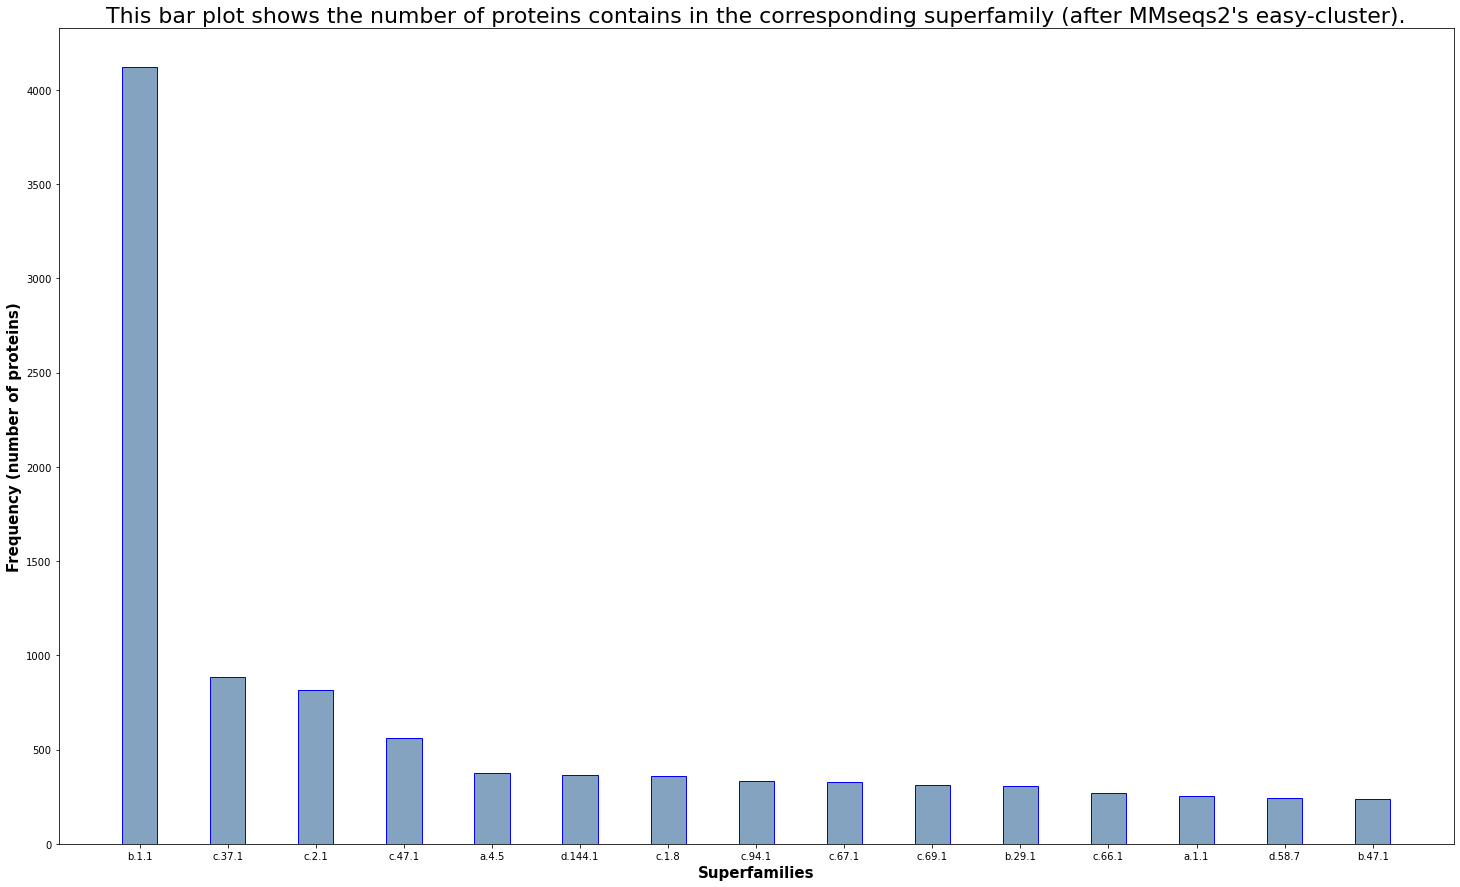

In [528]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (25, 15))
plt.bar(superfamilies[:15], members[:15], width = 0.4, color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue')
plt.xlabel('Superfamilies', fontweight='bold', fontsize=15)
plt.ylabel('Frequency (number of proteins)', fontweight='bold', fontsize=15)
plt.title('This bar plot shows the number of proteins contains in the corresponding superfamily (after MMseqs2\'s easy-cluster).', fontsize=22)
plt.savefig(f'images-PNG/output-easy-cluster-15.png')
plt.savefig(f'images-JPG/output-easy-cluster-15.jpg')

In [529]:
# C = 1
# for i in range(15, len(members), 15):
#     fig = plt.figure(figsize = (25, 15))
#     plt.bar(superfamilies[i-15:i], members[i-15:i], width = 0.4, color=(0.2, 0.4, 0.6, 0.6),  edgecolor='blue')
#     plt.xlabel('Superfamilies', fontweight='bold', fontsize=15)
#     plt.ylabel('Frequency (number of proteins)', fontweight='bold', fontsize=15)
#     plt.title('This bar plot shows the number of proteins contains in the corresponding superfamily.', fontsize=22)
#     plt.savefig(f'images-PNG/{(i+1)-15}-{i}.png')
#     plt.savefig(f'images-JPG/{(i+1)-15}-{i}.jpg')
#     if C==5: break
#     C+=1
#     # plt.show()
# #end-for

In [530]:
# members
superfamilies[:15]

['b.1.1',
 'c.37.1',
 'c.2.1',
 'c.47.1',
 'a.4.5',
 'd.144.1',
 'c.1.8',
 'c.94.1',
 'c.67.1',
 'c.69.1',
 'b.29.1',
 'c.66.1',
 'a.1.1',
 'd.58.7',
 'b.47.1']

In [531]:
C = 1

d = {}
for header, sequence in esm.data.read_fasta(datasetLocation):
    header = '.'.join(header.split()[1].split('.')[0:-1])
    
    # print(header)
    
    if header not in d:
        d[header] = 1
    else:
        d[header] += 1
    
    # print()
    # if C==10: break
    # C += 1
#end-for

In [532]:
originalCounter =sorted(d.items(), key=lambda x: x[1], reverse=True)

In [533]:
# originalCounter

In [534]:
originalSuperfamilies = []
originalMembers = []
for v in originalCounter:
    originalSuperfamilies.append(v[0])
    originalMembers.append(v[1])
#end-for

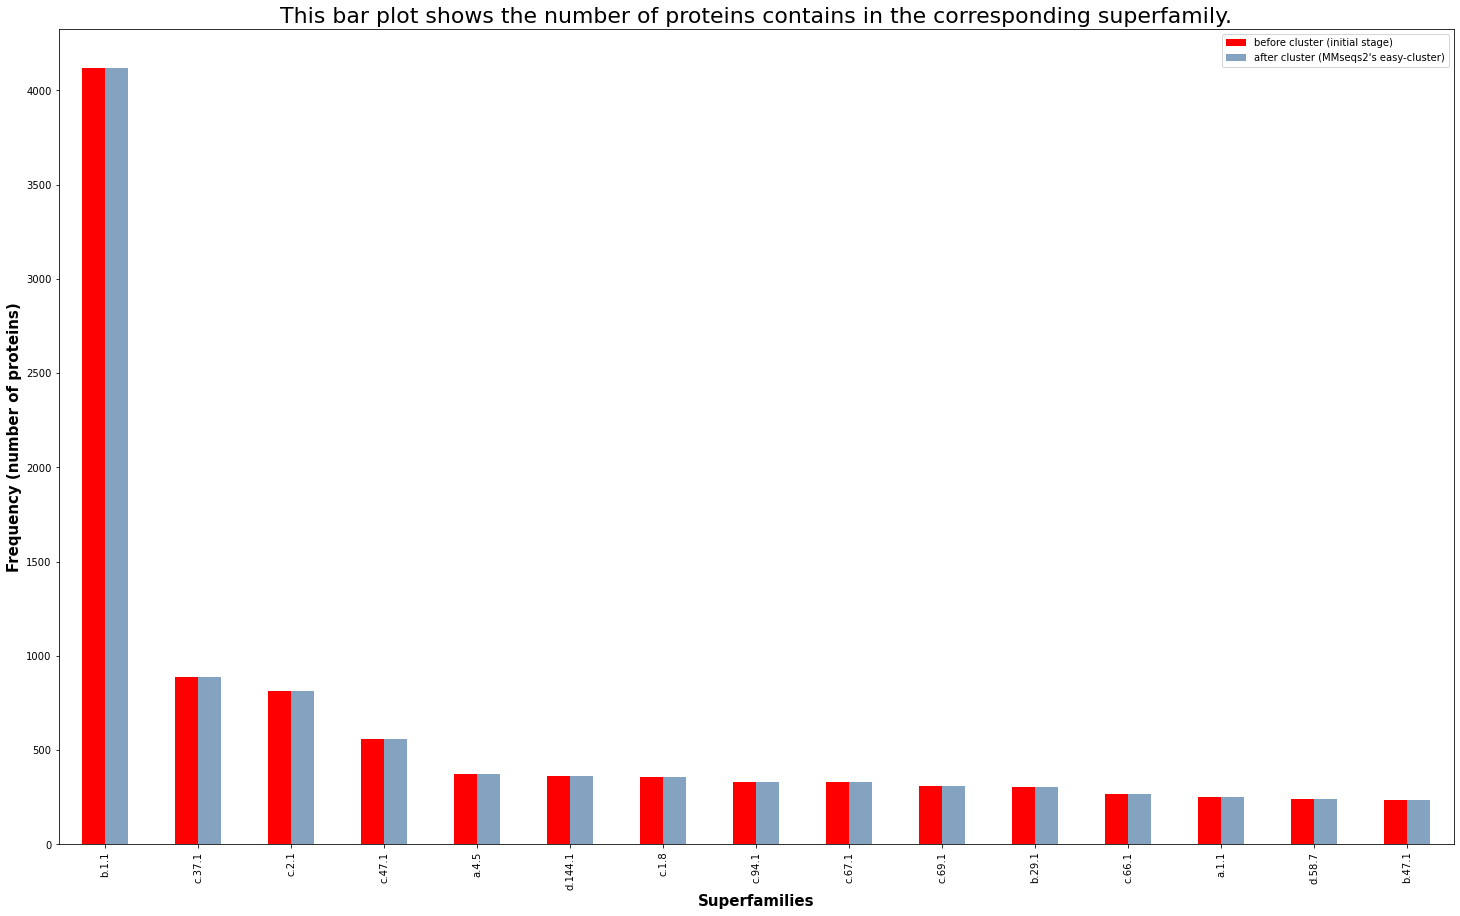

In [539]:
# fig = plt.figure(figsize = (25, 15))
plotdata = pd.DataFrame({
    "before cluster (initial stage)": originalMembers[:15],
    "after cluster (MMseqs2\'s easy-cluster)": members[:15]},
    index=superfamilies[:15]
)

plotdata.plot(kind="bar",figsize=(25, 15), color={'after cluster (MMseqs2\'s easy-cluster)': (0.2, 0.4, 0.6, 0.6), 'before cluster (initial stage)': 'red'})
# (0.2, 0.4, 0.6, 0.6)


# index=["Django", "Gafur", "Tommy", "Ronnie"])
#superfamilies[:15], members[:15]

# color=(0.2, 0.4, 0.6, 0.6)

plt.xlabel('Superfamilies', fontweight='bold', fontsize=15)
plt.ylabel('Frequency (number of proteins)', fontweight='bold', fontsize=15)
plt.title('This bar plot shows the number of proteins contains in the corresponding superfamily.', fontsize=22)
plt.savefig(f'images-PNG/compared-easy-cluster-15.png')
plt.savefig(f'images-JPG/compared-easy-cluster-15.jpg')

plt.show()

In [540]:
# help(plotdata.plot)

### All superfamilies compared (MMseqs2/Linclust):

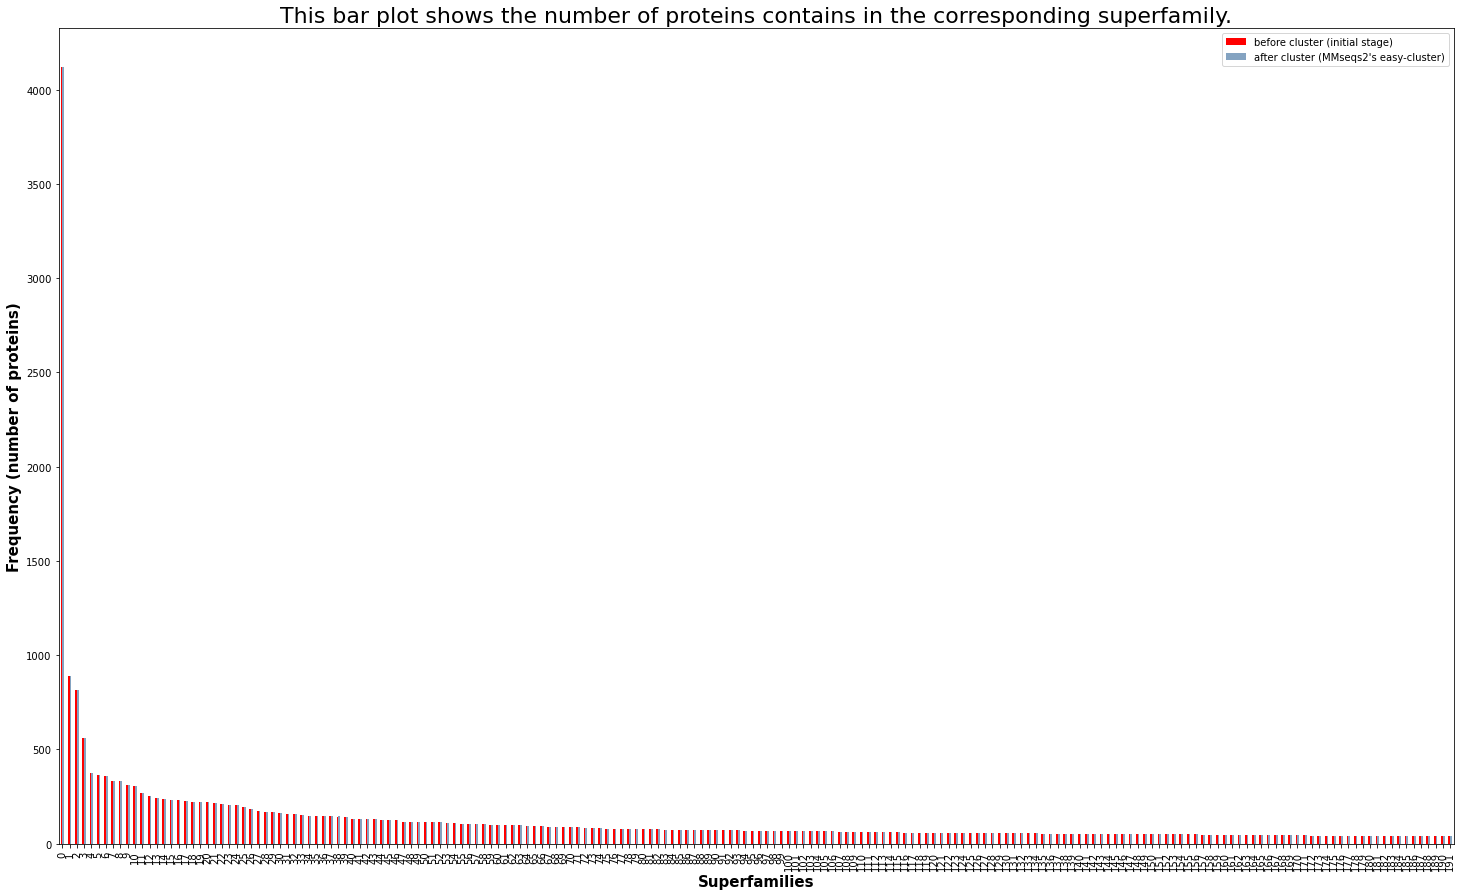

In [541]:
# fig = plt.figure(figsize = (25, 15))
plotdata = pd.DataFrame({
    "before cluster (initial stage)": originalMembers[:],
    "after cluster (MMseqs2\'s easy-cluster)": members[:]},
    index=range(len(superfamilies[:]))
)

plotdata.plot(kind="bar",figsize=(25, 15), color={'after cluster (MMseqs2\'s easy-cluster)': (0.2, 0.4, 0.6, 0.6), 'before cluster (initial stage)': 'red'})
# (0.2, 0.4, 0.6, 0.6)


# index=["Django", "Gafur", "Tommy", "Ronnie"])
#superfamilies[:15], members[:15]

# color=(0.2, 0.4, 0.6, 0.6)

plt.xlabel('Superfamilies', fontweight='bold', fontsize=15)
plt.ylabel('Frequency (number of proteins)', fontweight='bold', fontsize=15)
plt.title('This bar plot shows the number of proteins contains in the corresponding superfamily.', fontsize=22)
plt.savefig(f'images-PNG/all-compared-easy-cluster.png')
plt.savefig(f'images-JPG/all-compared-easy-cluster.jpg')

plt.show()

In [109]:
# help(plt.savefig)